1. IMPORTACION DE LIBRERIAS

In [2]:
!pip install keras
import keras

In [214]:
from google.colab.patches import cv2_imshow
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
import time
from PIL import Image
import pandas as pd

from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input


from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adam,SGD, RMSprop 
from google.colab import drive
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout, Input, BatchNormalization

import keras.backend as K
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.metrics import f1_score 
from keras import optimizers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

from sklearn.metrics import classification_report
from keras import layers, models

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
<class 'numpy.ndarray'>
(800, 1200)


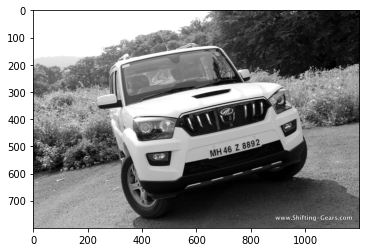

In [86]:
drive.mount('/content/drive/')

img_array = cv2.imread("/content/drive/MyDrive/placas1/licensed_car44.jpeg",  cv2.IMREAD_GRAYSCALE) #categorias

plt.imshow(img_array, cmap = "gray")

print(type(img_array))

print(img_array.shape)


2. LECTURA DE DATOS DE LAS IMAGENES ETIQUETADAS POSICION DE BOXES DE LAS PLACAS

In [87]:
df = pd.read_csv("/content/drive/MyDrive/placas1/indian_license_plates.csv")

df["image_name"] = df["image_name"] + ".jpeg"

df.drop(["image_width", "image_height"], axis=1, inplace=True)

df


,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014
...,...,...,...,...,...
232,licensed_car232.jpeg,0.344000,0.609290,0.706000,0.778689
233,licensed_car233.jpeg,0.368000,0.453453,0.616000,0.618619
234,licensed_car234.jpeg,0.334000,0.608434,0.628000,0.768072
235,licensed_car235.jpeg,0.295222,0.601208,0.441980,0.719033


3. MUESTRA ALEATORIA

4. MONTAJE DE ARCHIVOS DESDE GOOGLE DRIVE

5. CARGA DE IMAGEN DE PRUEBA PARA TEST

<class 'numpy.ndarray'>
(287, 496)


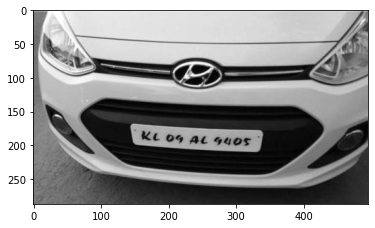

In [12]:
img_array = cv2.imread("/content/drive/MyDrive/placas1/licensed_car120.jpeg",  cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array, cmap = "gray")

print(type(img_array))

print(img_array.shape)


6. NORMALIZACION DE PARAMETROS DE IMAGEN- misma resolucion-mismos canales de color, en este caso [224 224 3] por el modelo VGG16 usado inicialmente

In [13]:
WIDTH = 224 

HEIGHT = 224 

CHANNEL = 3 

def show_img(index):

    image = cv2.imread("/content/drive/MyDrive/placas1/" + df["image_name"].iloc[index])

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = cv2.resize(image, dsize=(WIDTH, HEIGHT))
    
    tx = int(df["top_x"].iloc[index] * WIDTH)

    ty = int(df["top_y"].iloc[index] * HEIGHT)

    bx = int(df["bottom_x"].iloc[index] * WIDTH)

    by = int(df["bottom_y"].iloc[index] * HEIGHT)

    image = cv2.rectangle(image, (tx, ty), (bx, by), (0, 0, 255), 1)

    print(type(image))

    print(image.shape)

    plt.imshow(image)

    plt.show()

<class 'numpy.ndarray'>
(224, 224, 3)


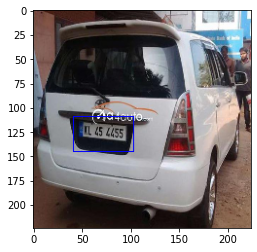

In [14]:
show_img(32)

7. MODELO 1

7.1. SEPARACION DE DATA DE ENTRENAMIENTO Y DATA DE PRUEBA

In [15]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1) #keras class 10% for validation

train_generator = datagen.flow_from_dataframe(

    df,

    directory="/content/drive/MyDrive/placas1/",

    x_col="image_name",

    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],

    target_size=(WIDTH, HEIGHT),

    batch_size=32, 

    class_mode="other",

    subset="training")

validation_generator = datagen.flow_from_dataframe(

    df,

    directory="/content/drive/MyDrive/placas1/",

    x_col="image_name",

    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],

    target_size=(WIDTH, HEIGHT),

    batch_size=32, 

    class_mode="other",

    subset="validation")


Found 214 validated image filenames.
Found 23 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

In [16]:
train_generator

In [46]:
type(train_generator)

keras.preprocessing.image.DataFrameIterator

In [17]:
validation_generator

In [47]:
type(validation_generator)

keras.preprocessing.image.DataFrameIterator

7.2. MODELO AHORA SI

1 MODELO SIMPLE - TRANSFER LEARNING

Usando un modelo pre-entrenado Imagenet con los parametros de imagen normalizados

Modelo VGG16:VDCN large scale image

[1] Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.


In [260]:
#modelo 1

model = Sequential()

model.add(VGG16(weights="imagenet", #trainning by imagenet
                
                include_top=False, #not include default shape (224,224,3)

                input_shape=(HEIGHT, WIDTH, CHANNEL))) 

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dense(128, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mse', 
              metrics=['acc']) 

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 4)                

In [257]:
input_layer = Input((WIDTH, HEIGHT, CHANNEL))
    
conv_layer1 = Conv2D(filters=512, kernel_size=(3, 3), activation='relu')(input_layer) #agregar padding
pooling_layer1 = MaxPooling2D(pool_size=(2, 2))(conv_layer1)
pooling_layer1 = BatchNormalization()(pooling_layer1)  
    
conv_layer2 = Conv2D(filters=512, kernel_size=(3, 3), activation='relu')(pooling_layer1)
pooling_layer2 = MaxPooling2D(pool_size=(2, 2))(conv_layer2)
pooling_layer2 = BatchNormalization()(pooling_layer2)

conv_layer3 = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(pooling_layer2)
pooling_layer3 = MaxPooling2D(pool_size=(2, 2))(conv_layer3)
pooling_layer3 = BatchNormalization()(pooling_layer3)

conv_layer4 = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(pooling_layer3)
pooling_layer4 = MaxPooling2D(pool_size=(2, 2))(conv_layer4)
pooling_layer4 = BatchNormalization()(pooling_layer4)

conv_layer5 = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(pooling_layer4)
pooling_layer5 = MaxPooling2D(pool_size=(2, 2))(conv_layer5)
pooling_layer5 = BatchNormalization()(pooling_layer5)

pooling_layer5 = layers.GlobalAveragePooling2D()(pooling_layer5)

dense_layer3 = Dense(units=256, activation='relu')(pooling_layer5)
dense_layer3 = Dropout(0.5)(dense_layer3)

dense_layer4 = Dense(units=256, activation='relu')(dense_layer3)
dense_layer4 = Dropout(0.4)(dense_layer4)

dense_layer5 = Dense(units=256, activation='relu')(dense_layer4)
dense_layer5 = Dropout(0.4)(dense_layer5)

output_layer = Dense(units=4, activation='sigmoid')(dense_layer5)

model2 = Model(inputs=input_layer, outputs=output_layer)

model2.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mse', 
              metrics=['acc']) 

model2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 222, 222, 512)     14336     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 111, 111, 512)     0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 111, 111, 512)     2048      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 109, 109, 512)     2359808   
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 54, 54, 512)       0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 54, 54, 512)       2048

PARAMETROS DEL MODELO

OPTIMIZACION Y LOSS FUNCTION



To find the minimum amount of step count to cover all the batches, the following equations are necessary. Mathematically;

Step size=⌈Number of elements/Batch Size⌉
 


EJECUCION DEL ENTRENAMIENTO MODELO

In [261]:
epochs = 50

checkpoint = ModelCheckpoint("model-epoch:{epoch:02d}-loss:{loss:.3f}-val_acc:{val_acc:.3f}-weights") 

callbacks = [checkpoint] #No modificar esta línea

In [262]:
#history = model2.fit(train_generator,
#                     validation_data=validation_generator,
#                     epochs=epochs,
#                     callbacks=[checkpoint])
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=epochs,
                    callbacks=[checkpoint])

Epoch 1/50
7/7 [==============================] - 5s 490ms/step - loss: 0.0664 - acc: 0.1355 - val_loss: 0.0323 - val_acc: 0.5217
INFO:tensorflow:Assets written to: model-epoch:01-loss:0.066-val_acc:0.522-weights/assets
Epoch 2/50
7/7 [==============================] - 2s 269ms/step - loss: 0.0294 - acc: 0.5140 - val_loss: 0.0367 - val_acc: 0.5217
INFO:tensorflow:Assets written to: model-epoch:02-loss:0.029-val_acc:0.522-weights/assets
Epoch 3/50
7/7 [==============================] - 2s 251ms/step - loss: 0.0266 - acc: 0.4673 - val_loss: 0.0263 - val_acc: 0.4783
INFO:tensorflow:Assets written to: model-epoch:03-loss:0.027-val_acc:0.478-weights/assets
Epoch 4/50
7/7 [==============================] - 2s 264ms/step - loss: 0.0250 - acc: 0.5187 - val_loss: 0.0274 - val_acc: 0.5217
INFO:tensorflow:Assets written to: model-epoch:04-loss:0.025-val_acc:0.522-weights/assets
Epoch 5/50
7/7 [==============================] - 2s 279ms/step - loss: 0.0228 - acc: 0.5981 - val_loss: 0.0237 - val_ac

7.3. ALMACENANDO MODELO ENTRENADO




8. RENDIMIENTO

In [305]:
def show_results(log):
  val_loss = log.history['val_loss']
  val_acc = log.history['val_acc']
      
  fig, axes = plt.subplots(1, 2, figsize=(14,4))
  ax1, ax2 = axes
  ax1.plot(log.history['loss'], label='train')
  ax1.plot(val_loss, label='test')
  ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
  ax2.plot(log.history['acc'], label='train')
  ax2.plot(val_acc, label='test')
  ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
  
  for ax in axes: ax.legend()

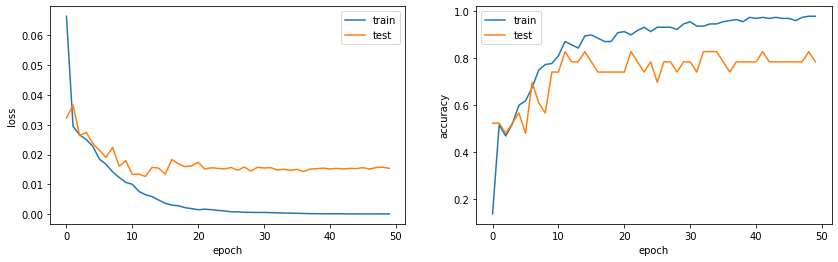

In [306]:
show_results(history)

9. COMPROBACION

In [266]:
model.evaluate(validation_generator)


1/1 [==============================] - 0s 235ms/step - loss: 0.0154 - acc: 0.7826


[0.015394100919365883, 0.782608687877655]

In [267]:
lucky_test_samples = np.random.randint(0, len(df), 5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


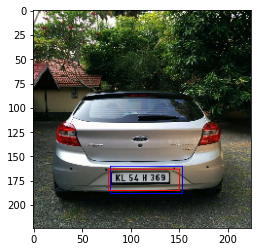

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


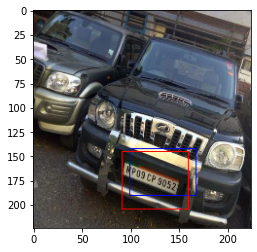

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


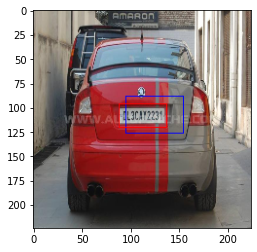

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


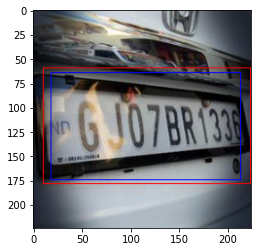

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


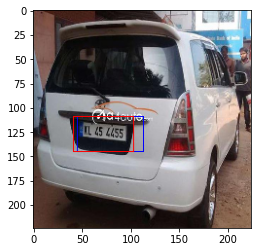

In [269]:
for idx, row in df.iloc[lucky_test_samples].iterrows():  

    img = cv2.resize(cv2.imread("/content/drive/MyDrive/placas1/" + row[0]) / 255.0, dsize=(WIDTH, HEIGHT))

    y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH
    
    xt, yt = y_hat[0], y_hat[1]

    xb, yb = y_hat[2], y_hat[3]
    
    img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)

    image = cv2.rectangle(img, (xt, yt), (xb, yb), (0, 0, 255), 1)

    image2 = cv2.rectangle(img, ((df["top_x"].iloc[idx]*WIDTH).astype(np.float32), (df["top_y"].iloc[idx]*HEIGHT).astype(np.float32)), ((df["bottom_x"].iloc[idx]*WIDTH).astype(np.float32), (df["bottom_y"].iloc[idx]*HEIGHT).astype(np.float32)), (255, 0, 0), 1)

    plt.imshow(image)

    plt.imshow(image2)

    plt.show()

44


10. PRUEBA CON IMAGEN NUEVA

In [270]:
#model_fin = load_model("model-epoch:50-loss:0.000-val_acc:0.783-weights")

model_fin = load_model("model-epoch:49-loss:0.000-val_acc:0.826-weights")


In [271]:
val_loss, val_acc = model_fin.evaluate(validation_generator)

print("Validation: Loss -> {:.4f} | Accuracy {:.4f}".format(val_loss, val_acc))

1/1 [==============================] - 0s 389ms/step - loss: 0.0158 - acc: 0.8261
Validation: Loss -> 0.0158 | Accuracy 0.8261


In [286]:
true_top= []

true_bottom= []

predict_top = []

predict_bottom = []

for idx, row in df.iterrows():  

    img = cv2.resize(cv2.imread("/content/drive/MyDrive/placas1/" + row[0]) / 255.0, dsize=(WIDTH, HEIGHT))

    y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH
    
    top_predict = [y_hat[0], y_hat[1]]

    bottom_predict = [y_hat[2], y_hat[3]]

    top_test = [(df["top_x"].iloc[idx]*WIDTH).astype(np.float32), (df["top_y"].iloc[idx]*HEIGHT).astype(np.float32)]

    bottom_test = [(df["bottom_x"].iloc[idx]*WIDTH).astype(np.float32), (df["bottom_y"].iloc[idx]*HEIGHT).astype(np.float32)]
    
    true_top.append(top_test)

    true_bottom.append(bottom_test)

    predict_top.append(top_predict)

    predict_bottom.append(bottom_predict)


In [287]:
true_top

[[161.7469, 131.70816],
 [36.275303, 190.57462],
 [18.368, 156.2293],
 [97.216, 149.49254],
 [46.76923, 87.53108],
 [57.076923, 145.52205],
 [92.28312, 118.64616],
 [108.74182, 103.44879],
 [92.00978, 101.632],
 [92.55746, 88.95072],
 [69.78193, 77.28],
 [76.125, 110.10663],
 [75.25, 95.77931],
 [40.32, 93.1236],
 [67.648, 87.06415],
 [79.29716, 120.024925],
 [85.055916, 138.58994],
 [28.717949, 132.19672],
 [152.06505, 108.86514],
 [63.860718, 80.0],
 [70.53617, 106.32533],
 [76.249374, 1.092683],
 [72.916664, 110.6875],
 [84.0, 92.53125],
 [60.48, 122.85873],
 [101.589745, 88.60445],
 [68.32, 100.93827],
 [21.952, 103.85965],
 [25.010595, 18.504349],
 [16.977995, 10.529915],
 [42.17115, 47.880417],
 [100.8, 110.40569],
 [41.495083, 109.921646],
 [14.115068, 138.85612],
 [71.3806, 87.67607],
 [83.011765, 86.50808],
 [67.9, 92.4],
 [89.89474, 97.548386],
 [108.98778, 118.49275],
 [5.9733334, 80.64],
 [49.6, 87.96567],
 [67.02702, 110.53275],
 [11.648, 143.49144],
 [11.648, 13.945525],


In [288]:
true_bottom

[[194.54094, 154.30043],
 [130.5911, 224.0],
 [51.52, 185.4777],
 [160.832, 171.46269],
 [193.7902, 220.41919],
 [140.53847, 174.10674],
 [180.5009, 155.07692],
 [161.28, 133.48232],
 [127.42625, 115.712],
 [131.44254, 139.59421],
 [147.23987, 122.64],
 [109.15625, 127.29259],
 [152.95, 123.071266],
 [99.37454, 140.94382],
 [161.28, 157.22264],
 [149.62274, 150.38007],
 [142.43953, 171.89449],
 [89.50427, 171.36612],
 [197.13821, 133.37404],
 [180.85745, 165.47368],
 [169.19148, 164.26666],
 [142.72319, 24.039024],
 [142.04167, 127.75],
 [166.83333, 108.5],
 [160.90666, 172.49861],
 [155.4359, 110.00889],
 [170.61333, 147.48972],
 [110.656, 165.05263],
 [204.28362, 92.1971],
 [209.39528, 82.643875],
 [213.77669, 186.16443],
 [127.232, 141.89323],
 [103.18688, 145.02267],
 [80.39452, 165.9112],
 [149.69846, 122.856445],
 [143.36, 105.91483],
 [136.5, 129.73334],
 [141.47368, 153.54839],
 [125.235535, 127.90725],
 [223.25333, 167.25333],
 [100.8, 123.53648],
 [146.59459, 145.74672],
 [73

In [289]:
predict_top

[[152.27531, 114.90167],
 [79.806946, 171.22993],
 [68.43657, 107.61843],
 [87.33364, 129.27644],
 [32.897507, 56.608124],
 [76.49259, 142.8789],
 [80.645744, 105.64444],
 [50.802677, 90.76786],
 [109.61957, 90.00552],
 [125.49355, 135.84561],
 [75.35034, 83.64017],
 [83.115204, 97.385],
 [79.3639, 85.86733],
 [24.67529, 100.54432],
 [78.84016, 112.106026],
 [93.41975, 108.95155],
 [86.530464, 144.1941],
 [23.910728, 120.34157],
 [123.641014, 100.89962],
 [78.698235, 108.20198],
 [64.50594, 118.85997],
 [103.79155, 99.19244],
 [97.1435, 102.53731],
 [78.54396, 84.876755],
 [64.51544, 124.65088],
 [86.33407, 84.20839],
 [69.65804, 103.15929],
 [26.220966, 101.45799],
 [25.0146, 17.216167],
 [16.419891, 15.581567],
 [46.689335, 55.96936],
 [92.692, 116.75872],
 [45.725544, 109.48],
 [30.670345, 135.94249],
 [71.72538, 86.34216],
 [83.62008, 89.630516],
 [67.92512, 112.38406],
 [87.37332, 98.7979],
 [103.90847, 116.690346],
 [3.7919025, 80.01523],
 [62.81867, 81.84943],
 [74.47465, 112.59

In [290]:
predict_bottom

[[203.1019, 155.51784],
 [169.14107, 201.56679],
 [129.59273, 156.02597],
 [168.22397, 181.80858],
 [193.736, 183.67123],
 [168.89203, 184.02374],
 [158.57732, 157.17418],
 [114.49759, 138.00653],
 [145.00308, 112.59382],
 [191.56259, 159.99911],
 [157.70915, 123.6992],
 [156.7791, 128.01837],
 [154.65776, 130.59723],
 [131.06873, 144.65674],
 [155.35178, 148.6611],
 [171.5034, 159.28015],
 [159.71811, 172.57658],
 [93.10881, 173.08765],
 [169.19798, 123.37998],
 [172.12164, 158.3054],
 [158.87769, 156.29318],
 [173.66805, 138.21501],
 [153.03735, 136.51639],
 [176.57832, 111.074615],
 [165.16594, 172.75812],
 [153.02988, 109.20006],
 [169.02754, 143.23944],
 [106.34858, 159.43735],
 [206.19812, 76.80178],
 [209.79814, 74.63531],
 [213.16986, 184.9288],
 [119.44571, 140.08727],
 [113.24382, 145.30983],
 [82.98777, 164.1636],
 [147.65663, 126.11664],
 [140.70634, 117.33493],
 [151.70572, 159.54742],
 [140.97385, 150.53038],
 [124.43055, 154.61317],
 [223.00894, 164.31587],
 [122.51593, 

In [291]:
true_top_f = np.concatenate(true_top, axis=0)

predict_top_f = np.concatenate(predict_top, axis=0)

In [292]:
true_bottom_f = np.concatenate(true_bottom, axis=0)

predict_bottom_f = np.concatenate(predict_bottom, axis=0)

In [293]:
true_top_f

array([161.7469   , 131.70816  ,  36.275303 , 190.57462  ,  18.368    ,
       156.2293   ,  97.216    , 149.49254  ,  46.76923  ,  87.53108  ,
        57.076923 , 145.52205  ,  92.28312  , 118.64616  , 108.74182  ,
       103.44879  ,  92.00978  , 101.632    ,  92.55746  ,  88.95072  ,
        69.78193  ,  77.28     ,  76.125    , 110.10663  ,  75.25     ,
        95.77931  ,  40.32     ,  93.1236   ,  67.648    ,  87.06415  ,
        79.29716  , 120.024925 ,  85.055916 , 138.58994  ,  28.717949 ,
       132.19672  , 152.06505  , 108.86514  ,  63.860718 ,  80.       ,
        70.53617  , 106.32533  ,  76.249374 ,   1.092683 ,  72.916664 ,
       110.6875   ,  84.       ,  92.53125  ,  60.48     , 122.85873  ,
       101.589745 ,  88.60445  ,  68.32     , 100.93827  ,  21.952    ,
       103.85965  ,  25.010595 ,  18.504349 ,  16.977995 ,  10.529915 ,
        42.17115  ,  47.880417 , 100.8      , 110.40569  ,  41.495083 ,
       109.921646 ,  14.115068 , 138.85612  ,  71.3806   ,  87.6

In [294]:
predict_top_f

array([152.27531  , 114.90167  ,  79.806946 , 171.22993  ,  68.43657  ,
       107.61843  ,  87.33364  , 129.27644  ,  32.897507 ,  56.608124 ,
        76.49259  , 142.8789   ,  80.645744 , 105.64444  ,  50.802677 ,
        90.76786  , 109.61957  ,  90.00552  , 125.49355  , 135.84561  ,
        75.35034  ,  83.64017  ,  83.115204 ,  97.385    ,  79.3639   ,
        85.86733  ,  24.67529  , 100.54432  ,  78.84016  , 112.106026 ,
        93.41975  , 108.95155  ,  86.530464 , 144.1941   ,  23.910728 ,
       120.34157  , 123.641014 , 100.89962  ,  78.698235 , 108.20198  ,
        64.50594  , 118.85997  , 103.79155  ,  99.19244  ,  97.1435   ,
       102.53731  ,  78.54396  ,  84.876755 ,  64.51544  , 124.65088  ,
        86.33407  ,  84.20839  ,  69.65804  , 103.15929  ,  26.220966 ,
       101.45799  ,  25.0146   ,  17.216167 ,  16.419891 ,  15.581567 ,
        46.689335 ,  55.96936  ,  92.692    , 116.75872  ,  45.725544 ,
       109.48     ,  30.670345 , 135.94249  ,  71.72538  ,  86.3

In [295]:
def round_values(values):
  return K.round(values)

def binary_accuracy(y_true, y_pred):
  return K.mean(K.equal(y_true, round_values(y_pred))).numpy()

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))


def fbeta(y_true, y_pred, beta=2):
    y_pred = K.clip(y_pred, 0, 1)

    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    num = (1 + beta ** 2) * (p * r)
    den = (beta ** 2 * p + r + K.epsilon())
    return K.mean(num / den)


def matthews_correlation_coefficient(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())


def equal_error_rate(y_true, y_pred):
    n_imp = tf.count_nonzero(tf.equal(y_true, 0), dtype=tf.float32) + tf.constant(K.epsilon())
    n_gen = tf.count_nonzero(tf.equal(y_true, 1), dtype=tf.float32) + tf.constant(K.epsilon())

    scores_imp = tf.boolean_mask(y_pred, tf.equal(y_true, 0))
    scores_gen = tf.boolean_mask(y_pred, tf.equal(y_true, 1))

    loop_vars = (tf.constant(0.0), tf.constant(1.0), tf.constant(0.0))
    cond = lambda t, fpr, fnr: tf.greater_equal(fpr, fnr)
    body = lambda t, fpr, fnr: (
        t + 0.001,
        tf.divide(tf.count_nonzero(tf.greater_equal(scores_imp, t), dtype=tf.float32), n_imp),
        tf.divide(tf.count_nonzero(tf.less(scores_gen, t), dtype=tf.float32), n_gen)
    )
    t, fpr, fnr = tf.while_loop(cond, body, loop_vars, back_prop=False)
    eer = (fpr + fnr) / 2

    return eer

In [307]:
top_accuracy_calculated = precision(true_top_f, predict_top_f)

print("Validation: Accuracy Calculated {:.6f}".format(top_accuracy_calculated))

Validation: Accuracy Calculated 1.000000


In [299]:
true_top_f.shape, predict_top_f.shape

((474,), (474,))

In [300]:
predict_top_ff = round_values(predict_top_f).numpy()
true_top_ff = round_values(true_top_f).numpy()

In [301]:
print(classification_report(true_top_ff, predict_top_ff))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         2
        11.0       1.00      0.33      0.50         3
        12.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         2
        18.0       0.00      0.00      0.00         3
        19.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [302]:
bottom_accuracy_calculated = f1(true_bottom_f, predict_bottom_f)

print("Validation: Accuracy Calculated {:.4f}".format(bottom_accuracy_calculated))

Validation: Accuracy Calculated 1.0000


In [303]:
predict_bottom_ff = round_values(predict_bottom_f).numpy()
true_bottom_ff = round_values(true_bottom_f).numpy()

In [304]:
print(classification_report(true_bottom_ff, predict_bottom_ff))

              precision    recall  f1-score   support

        24.0       0.00      0.00      0.00         1
        34.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         1
        62.0       0.00      0.00      0.00         1
        64.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         0
        66.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         0
        72.0       0.00      0.00      0.00         1
        73.0       0.00      0.00      0.00         1
        74.0       0.00      0.00      0.00         0
        75.0       0.00      0.00      0.00         0
        77.0       0.00      0.00      0.00         0
        78.0       0.00      0.00      0.00         0
        80.0       0.00      0.00      0.00         1
        83.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12.RECONOCIMIENTO DE CARACTERES OCR